In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('toluca.csv')
df

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361
5,60,224
6,120,546
7,80,352
8,100,353
9,50,157


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
lotSize      25 non-null int64
workHours    25 non-null int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [5]:
df.describe()

,lotSize,workHours
count,25.000000,25.000000
mean,70.000000,312.280000
std,28.722813,113.137645
min,20.000000,113.000000
25%,50.000000,224.000000
50%,70.000000,342.000000
75%,90.000000,389.000000
max,120.000000,546.000000


In [6]:
df.columns

Index(['lotSize', 'workHours'], dtype='object')

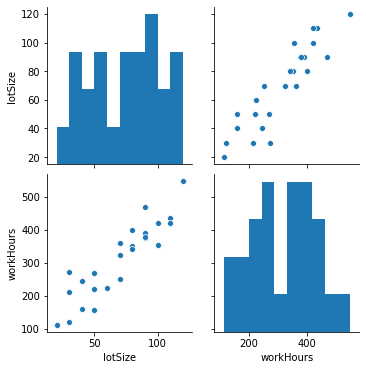

In [7]:
sns.pairplot(df)

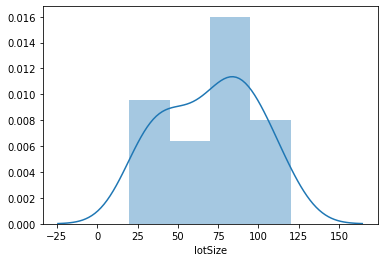

In [8]:
sns.distplot(df['lotSize'])

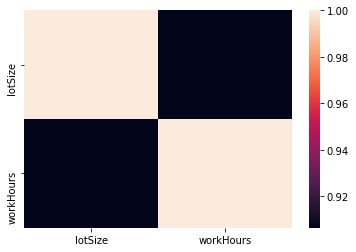

In [12]:
#df.corr()
sns.heatmap(df.corr())

In [17]:
df.columns
X = df['workHours']
y = df['lotSize']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('lotSize',axis=1), y, test_size=0.4, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_test

16     30
10     40
22     40
19    110
7      80
21     90
2      50
3      90
1      30
14    110
Name: lotSize, dtype: int64

In [33]:
X_test

,workHours
16,212
10,160
22,244
19,421
7,352
21,468
2,221
3,376
1,121
14,435


In [34]:
X_train

,workHours
18,377
0,399
12,389
5,224
23,342
20,273
4,361
8,353
13,113
9,157


In [35]:
lm.coef_

array([0.21777352])

In [36]:
lm.intercept_

2.3560269704318415

In [37]:
coeff_df = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])
coeff_df

,Coeff
workHours,0.217774


In [38]:
prediction = lm.predict(X_test)
prediction

array([ 48.52401409,  37.19979084,  55.49276687,  94.03868065,
        79.01230748, 104.27403628,  50.48397581,  84.23887206,
        28.7066234 ,  97.08750998])

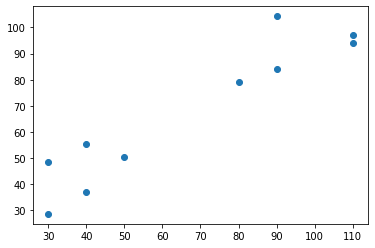

In [39]:
plt.scatter(y_test,prediction)

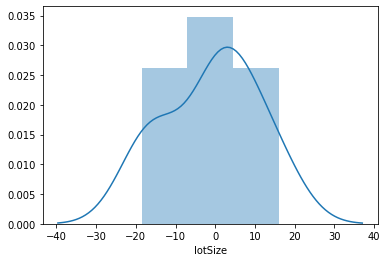

In [40]:
sns.distplot(y_test-prediction)

In [41]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction)

8.849100865673147

In [42]:
metrics.mean_squared_error(y_test,prediction)

125.2323507758507

In [43]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

11.190726105836507